DR_NO = Eindeutige Fallnummer (Jahr + Area + ID)

DATE_RPTD = Datum, wann das Verbrechen gemeldet wurde

DATE_OCC = Datum, wann das Verbrechen stattgefunden hat

TIME_OCC = Uhrzeit der Tat (24h Format, z. B. 2145)

AREA = Nummer des LAPD-Bezirks (1–21)

AREA_NAME = Name des LAPD-Bezirks (z. B. Newton, Hollywood)

RPT_DIST_NO = Reporting District (kleinere Zone im Bezirk)

PART_1_2 = Schweregrad (Part 1 = grave, Part 2 = less severe)

CRM_CD = Crime Code des Delikts (numerisch)

CRM_CD_DESC = Beschreibung des Crime Codes (Text)

MOCODES = Modus Operandi des Täters (Verhaltensmuster)

VICT_AGE = Alter des Opfers

VICT_SEX = Geschlecht des Opfers (F, M, X=Unknown)

VICT_DESCENT = Herkunft/Ethnie des Opfers (Code)

PREMIS_CD = Ortstyp (z. B. Straße, Haus, Geschäft)

PREMIS_DESC = Beschreibung des Ortstyps

WEAPON_USED_CD = Waffe (Code)

WEAPON_DESC = Beschreibung der Waffe

STATUS = Status des Falls (z. B. IC = initial)

STATUS_DESC = Beschreibung des Status

CRM_CD_1 = Primärcrime (wichtigste Straftat)

CRM_CD_2 = Zweite Straftat (falls vorhanden)

CRM_CD_3 = Dritte Straftat

CRM_CD_4 = Vierte Straftat

LOCATION = Adresse (gerundet auf 100 Block)

CROSS_STREET = Kreuzstraße zur Adresse

LAT = Latitude (Breitengrad)

LON = Longitude (Längengrad)


In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
sns.set_palette("viridis")

In [231]:
data = pd.read_csv('../data/raw/Crime_Data_from_2020_to_Present.csv', sep=',')
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

### Preprocessing

In [233]:
# Einheitliches format
data.columns = (
    data.columns
    .str.strip()                # leading/trailing spaces entfernen
    .str.replace(' ', '_')      # Leerzeichen ersetzen
    .str.replace('-', '_')      # Bindestriche ersetzen
    .str.upper()                # alles groß
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004991 non-null  int64  
 1   DATE_RPTD       1004991 non-null  object 
 2   DATE_OCC        1004991 non-null  object 
 3   TIME_OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA_NAME       1004991 non-null  object 
 6   RPT_DIST_NO     1004991 non-null  int64  
 7   PART_1_2        1004991 non-null  int64  
 8   CRM_CD          1004991 non-null  int64  
 9   CRM_CD_DESC     1004991 non-null  object 
 10  MOCODES         853372 non-null   object 
 11  VICT_AGE        1004991 non-null  int64  
 12  VICT_SEX        860347 non-null   object 
 13  VICT_DESCENT    860335 non-null   object 
 14  PREMIS_CD       1004975 non-null  float64
 15  PREMIS_DESC     1004403 non-null  object 
 16  WEAPON_USED_CD  327247 non-null   fl

In [234]:
# Umwandlung object zu datatime
data['DATE_RPTD'] = pd.to_datetime(data['DATE_RPTD'])
data['DATE_OCC'] = pd.to_datetime(data['DATE_OCC'])  
data.info()

/var/folders/tj/7mvrvxz94yzdsyf2fkrpjyz80000gn/T/ipykernel_89885/4256417050.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DATE_RPTD'] = pd.to_datetime(data['DATE_RPTD'])
/var/folders/tj/7mvrvxz94yzdsyf2fkrpjyz80000gn/T/ipykernel_89885/4256417050.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DATE_OCC'] = pd.to_datetime(data['DATE_OCC'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   DR_NO           1004991 non-null  int64         
 1   DATE_RPTD       1004991 non-null  datetime64[ns]
 2   DATE_OCC        1004991 non-null  datetime64[ns]
 3   TIME_OCC        1004991 non-null  int64         
 4   AREA            1004991 non-null  int64         
 5   AREA_NAME       1004991 non-null  object        
 6   RPT_DIST_NO     1004991 non-null  int64         
 7   PART_1_2        1004991 non-null  int64         
 8   CRM_CD          1004991 non-null  int64         
 9   CRM_CD_DESC     1004991 non-null  object        
 10  MOCODES         853372 non-null   object        
 11  VICT_AGE        1004991 non-null  int64         
 12  VICT_SEX        860347 non-null   object        
 13  VICT_DESCENT    860335 non-null   object        
 14  PREMIS_CD       10

In [235]:
# Spalten auf Nullwerte und NAN überprüfen  
def zero_and_nan_report(df):
    results = []
    total = len(df)

    for col in df.columns:
        # NaN
        nan_count = df[col].isna().sum()
        
        # Zero only for numeric
        zero_count = (df[col] == 0).sum() if pd.api.types.is_numeric_dtype(df[col]) else None
        
        results.append([
            col,
            nan_count,
            f"{nan_count/total:.2%}",
            zero_count,
            f"{zero_count/total:.2%}" if zero_count is not None else '-'
        ])
    
    return pd.DataFrame(
        results, 
        columns=['Column', 'NaN Count', 'NaN %', 'Zero Count', 'Zero %']
    )

report = zero_and_nan_report(data)
report

,Column,NaN Count,NaN %,Zero Count,Zero %
0,DR_NO,0,0.00%,0.0,0.00%
1,DATE_RPTD,0,0.00%,NaN,-
2,DATE_OCC,0,0.00%,NaN,-
3,TIME_OCC,0,0.00%,0.0,0.00%
4,AREA,0,0.00%,0.0,0.00%
5,AREA_NAME,0,0.00%,NaN,-
6,RPT_DIST_NO,0,0.00%,0.0,0.00%
7,PART_1_2,0,0.00%,0.0,0.00%
8,CRM_CD,0,0.00%,0.0,0.00%
9,CRM_CD_DESC,0,0.00%,NaN,-


In [236]:
# Daten bereinigen
data['VICT_AGE'].replace(0, np.nan, inplace=True) # 0 zu NAN machen
data['VICT_SEX'] = data['VICT_SEX'].fillna('X') # 0 zu X machen = unbekannt
data['WEAPON_USED_CD'] = data['WEAPON_USED_CD'].fillna(0)
data['WEAPON_DESC'] = data['WEAPON_DESC'].fillna('NONE')

# Nur Zeilen behalten mit gültiger LAT und LON
data = data[(data['LAT'] != 0) & (data['LON'] != 0)]

/var/folders/tj/7mvrvxz94yzdsyf2fkrpjyz80000gn/T/ipykernel_89885/3039423922.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['VICT_AGE'].replace(0, np.nan, inplace=True) # 0 zu NAN machen


In [ ]:
# VICT_DESCENT (Wo nur Buchstaben drin steht) zum Inhalt mappen als neue Spalte VICT_DESCENT_FULL
descent_map = {
    "A": "Other Asian",
    "B": "Black",
    "C": "Chinese",
    "D": "Cambodian",
    "F": "Filipino",
    "G": "Guamanian",
    "H": "Hispanic/Latin/Mexican",
    "I": "American Indian/Alaskan Native",
    "J": "Japanese",
    "K": "Korean",
    "L": "Laotian",
    "O": "Other",
    "P": "Pacific Islander",
    "S": "Samoan",
    "U": "Hawaiian",
    "V": "Vietnamese",
    "W": "White",
    "X": "Unknown",
    "Z": "Asian Indian"
}
data['VICT_DESCENT_FULL'] = data['VICT_DESCENT'].map(descent_map)

In [238]:
data.head()

,DR_NO,DATE_RPTD,DATE_OCC,TIME_OCC,AREA,AREA_NAME,RPT_DIST_NO,PART_1_2,CRM_CD,CRM_CD_DESC,...,STATUS_DESC,CRM_CD_1,CRM_CD_2,CRM_CD_3,CRM_CD_4,LOCATION,CROSS_STREET,LAT,LON,VICT_DESCENT_FULL
0,211507896,2021-04-11,2020-11-07,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092,Hispanic/Latin/Mexican
1,201516622,2020-10-21,2020-10-18,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203,Hispanic/Latin/Mexican
2,240913563,2024-12-10,2020-10-30,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509,White
3,210704711,2020-12-24,2020-12-24,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747,Other Asian
4,201418201,2020-10-03,2020-09-29,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Hispanic/Latin/Mexican


### Feature Engineering

In [239]:
# Daten extrahieren von DATE_OCC
data['OCC_YEAR'] = data['DATE_OCC'].dt.year
data['OCC_MONTH'] = data['DATE_OCC'].dt.month
data['OCC_WEEKDAY'] = data['DATE_OCC'].dt.weekday
data['OCC_IS_WEEKEND'] = data['OCC_WEEKDAY'].isin([5,6]).map({True: 'YES', False: 'NO'})
data['OCC_HOUR'] = (data['TIME_OCC'] // 100).astype(int)
data.head()

data['OCC_IS_WEEKEND'].eq("YES").sum() #test

np.int64(286430)

In [240]:
# Testen ob daten nun clean sind
def zero_and_nan_report(df):
    results = []
    total = len(df)

    for col in df.columns:
        # NaN
        nan_count = df[col].isna().sum()
        
        # Zero only for numeric
        zero_count = (df[col] == 0).sum() if pd.api.types.is_numeric_dtype(df[col]) else None
        
        results.append([
            col,
            nan_count,
            f"{nan_count/total:.2%}",
            zero_count,
            f"{zero_count/total:.2%}" if zero_count is not None else '-'
        ])
    
    return pd.DataFrame(
        results, 
        columns=['Column', 'NaN Count', 'NaN %', 'Zero Count', 'Zero %']
    )

report = zero_and_nan_report(data)
report

,Column,NaN Count,NaN %,Zero Count,Zero %
0,DR_NO,0,0.00%,0.0,0.00%
1,DATE_RPTD,0,0.00%,NaN,-
2,DATE_OCC,0,0.00%,NaN,-
3,TIME_OCC,0,0.00%,0.0,0.00%
4,AREA,0,0.00%,0.0,0.00%
5,AREA_NAME,0,0.00%,NaN,-
6,RPT_DIST_NO,0,0.00%,0.0,0.00%
7,PART_1_2,0,0.00%,0.0,0.00%
8,CRM_CD,0,0.00%,0.0,0.00%
9,CRM_CD_DESC,0,0.00%,NaN,-


In [241]:
data.to_csv('../data/processed/Crime_Data_cleaned.csv', index=False)

### Data Exploration

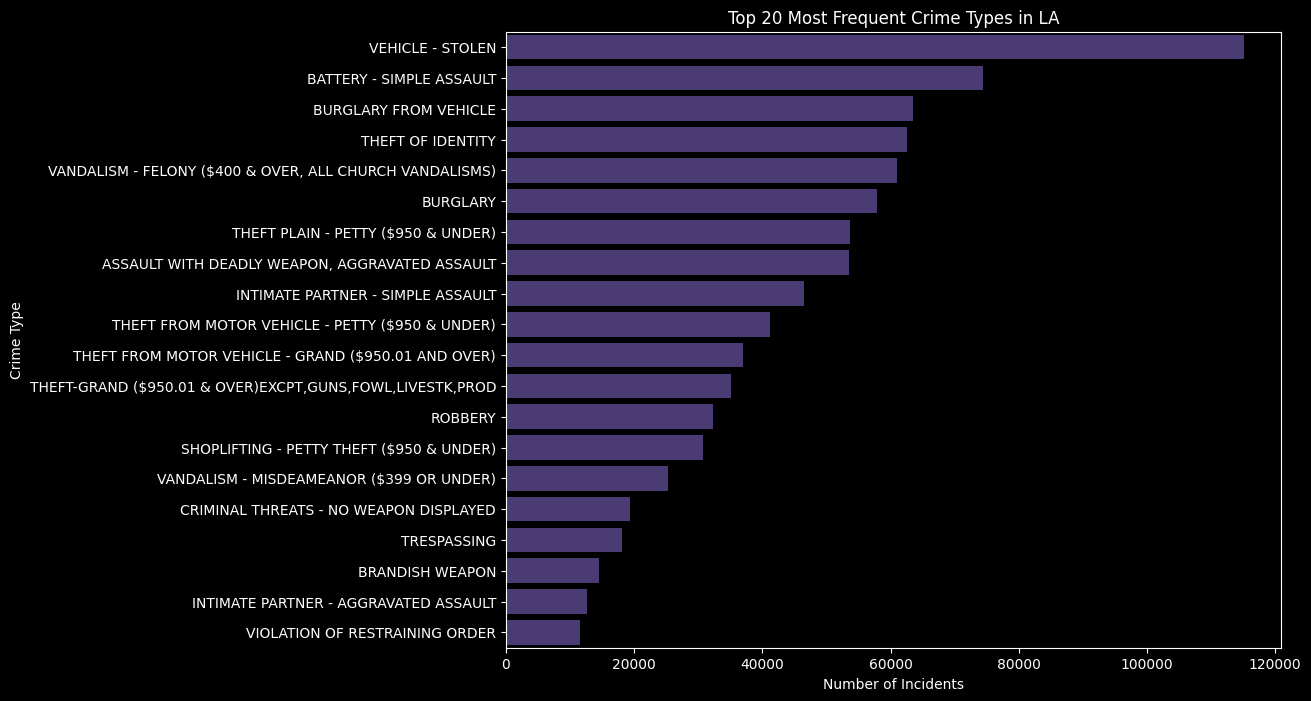

In [242]:
# Häufigste Straftaten anzeigen
top_crimes = data['CRM_CD_DESC'].value_counts().head(20)

plt.figure(figsize=(10,8))
sns.barplot(x=top_crimes.values, y=top_crimes.index)
plt.title("Top 20 Most Frequent Crime Types in LA")
plt.xlabel("Number of Incidents")
plt.ylabel("Crime Type")
plt.show()

### Analyse nach Zeit & Tag

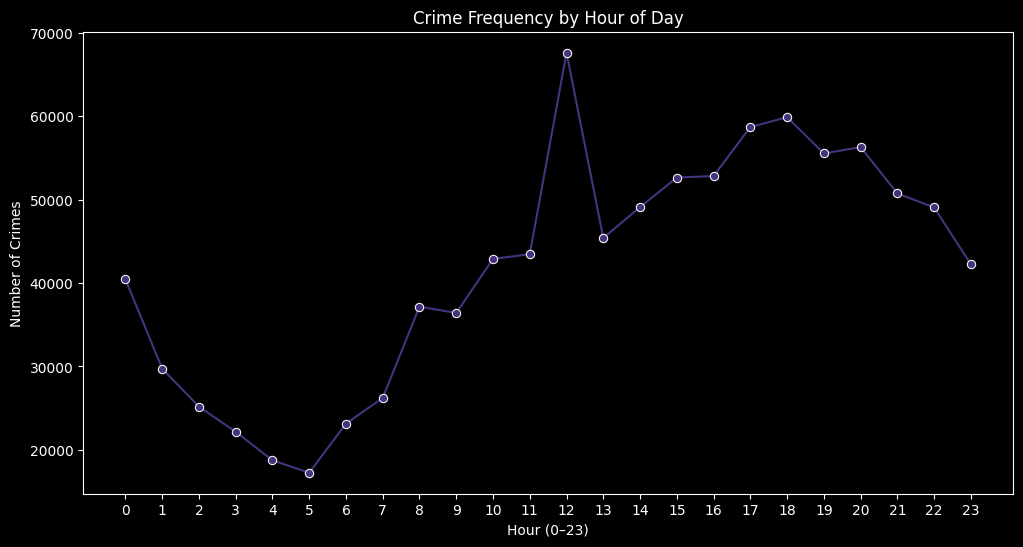

In [243]:
# Straftaten nach Stunde des Tages 
crime_by_hour = data['OCC_HOUR'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=crime_by_hour.index, y=crime_by_hour.values, marker="o")
plt.title("Crime Frequency by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Crimes")
plt.xticks(range(0,24))
plt.show()

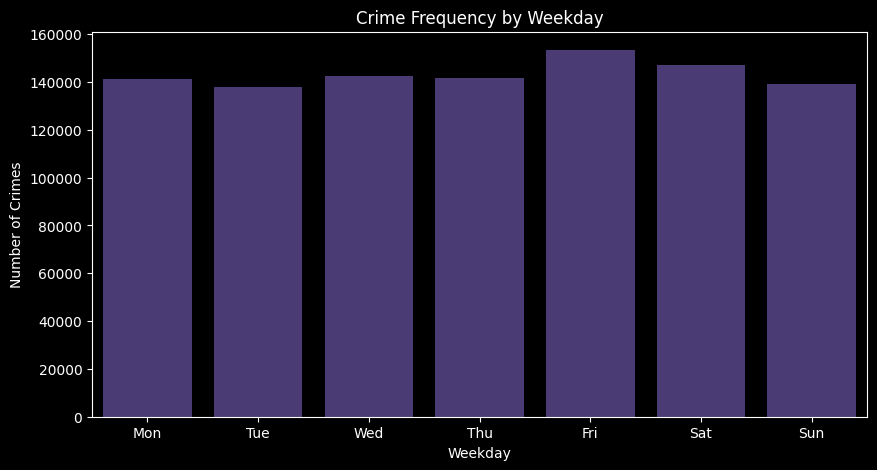

In [244]:
# Straftaten nach Wochentag
crime_by_day = data['OCC_WEEKDAY'].value_counts().sort_index()

weekday_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.figure(figsize=(10,5))
sns.barplot(x=weekday_labels, y=crime_by_day.values)
plt.title("Crime Frequency by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Crimes")
plt.show()

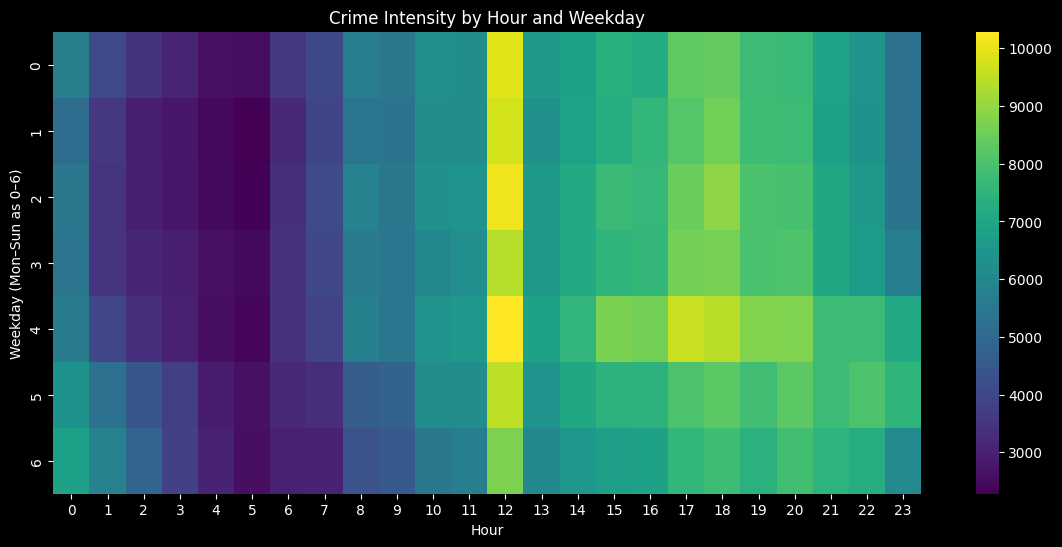

In [245]:
# Straftaten nach Wochentag und Uhrzeit
pivot = data.pivot_table(index='OCC_WEEKDAY', columns='OCC_HOUR', aggfunc='size', fill_value=0)

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap='viridis')
plt.title("Crime Intensity by Hour and Weekday")
plt.xlabel("Hour")
plt.ylabel("Weekday (Mon–Sun as 0–6)")
plt.show()

Average crimes per weekday: 143247.4
Average crimes per weekend day: 143208.5
Weekend days have 1.00x the crime of weekday days.


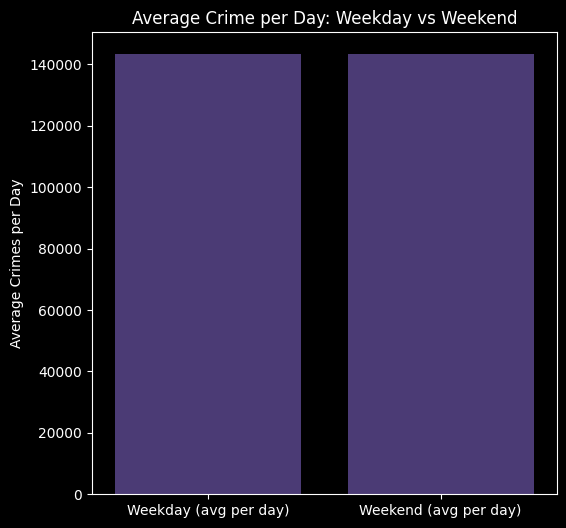

Auf Durchschnitt berechnet wird innerhalb der Woche genausoviel Kriminalität verübt wie am Wochenende.


In [263]:
# Vergleich Wochentag vs Wochenende auf avg runtergerechnet 
alldays = data['OCC_IS_WEEKEND'].value_counts()

weekdays = alldays['NO']
weekends = alldays['YES']

weekday_avg = weekdays / 5
print("Average crimes per weekday:", weekday_avg)

weekend_avg = weekends / 2
print("Average crimes per weekend day:", weekend_avg)

ratio = weekend_avg / weekday_avg
print(f"Weekend days have {ratio:.2f}x the crime of weekday days.")

avg_counts = {
    'Weekday (avg per day)': weekday_avg,
    'Weekend (avg per day)': weekend_avg
}

plt.figure(figsize=(6,6))
sns.barplot(
    x=list(avg_counts.keys()),
    y=list(avg_counts.values())
)
plt.title("Average Crime per Day: Weekday vs Weekend")
plt.xlabel("")
plt.ylabel("Average Crimes per Day")
plt.xticks(rotation=0)
plt.show()
print("Auf Durchschnitt berechnet wird innerhalb der Woche genausoviel Kriminalität verübt wie am Wochenende.")

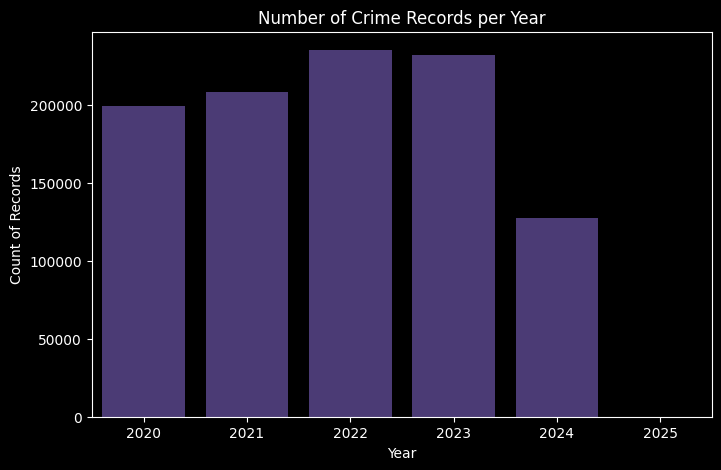

OCC_YEAR
2020    199056
2021    208432
2022    235258
2023    232341
2024    127567
2025        97
Name: count, dtype: int64


In [247]:
# Count rows per year
year_counts = data['OCC_YEAR'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title("Number of Crime Records per Year")
plt.xlabel("Year")
plt.ylabel("Count of Records")
plt.show()

print(year_counts)

In [248]:
# 2025 droppen da zu wenige daten
data = data[data['OCC_YEAR'] < 2025]

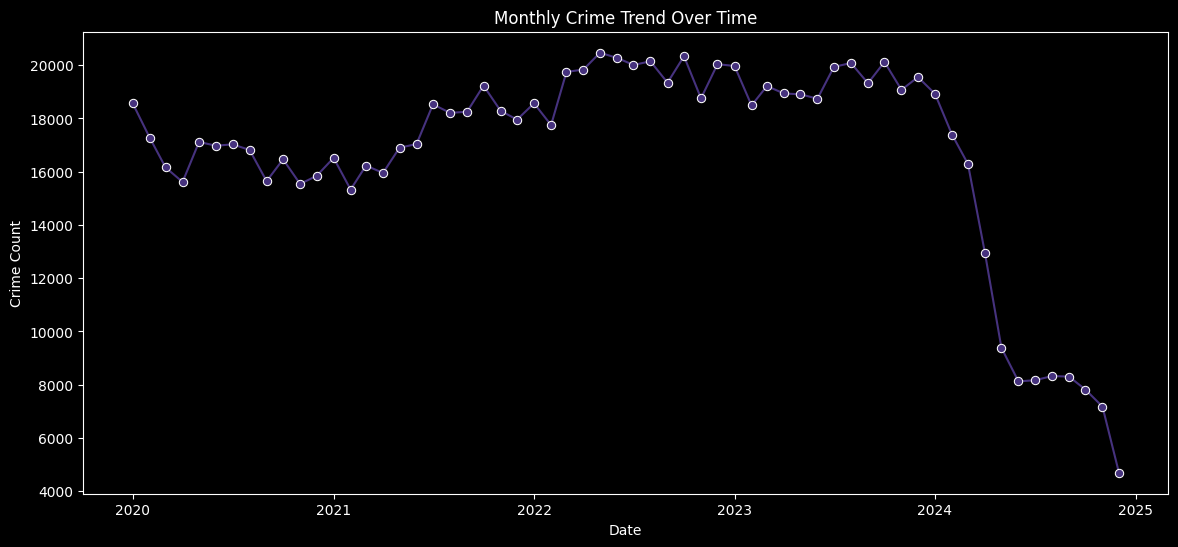

The sharp drop in 2024 is caused by the NIBRS migration and is not indicative of reduced crime..


In [249]:
# Kriminalitätstrend über die Monate
monthly = data.groupby(['OCC_YEAR','OCC_MONTH']).size().reset_index(name='count')
monthly['date'] = pd.to_datetime(monthly['OCC_YEAR'].astype(str) + '-' + monthly['OCC_MONTH'].astype(str) + '-01')

plt.figure(figsize=(14,6))
sns.lineplot(x='date', y='count', data=monthly, marker="o")
plt.title("Monthly Crime Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Crime Count")
plt.show()
print("The sharp drop in 2024 is caused by the NIBRS migration and is not indicative of reduced crime..")

### Analse nach Standort

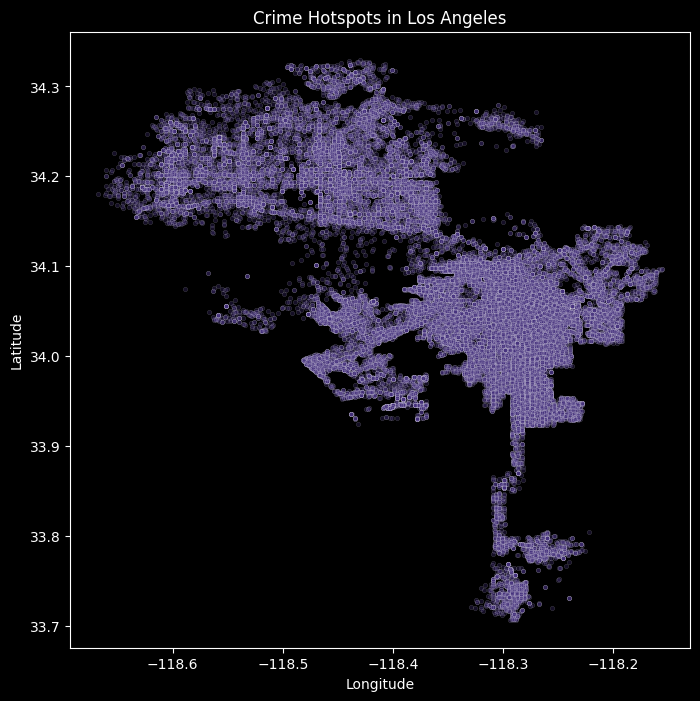

In [ ]:
# Kriminalitätshotspots in Los Angeles visualisieren
sample = data.sample(50000)

plt.figure(figsize=(8,8))
sns.scatterplot(x='LON', y='LAT', data=sample, alpha=0.3, s=10)
plt.title("Crime Hotspots in Los Angeles")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

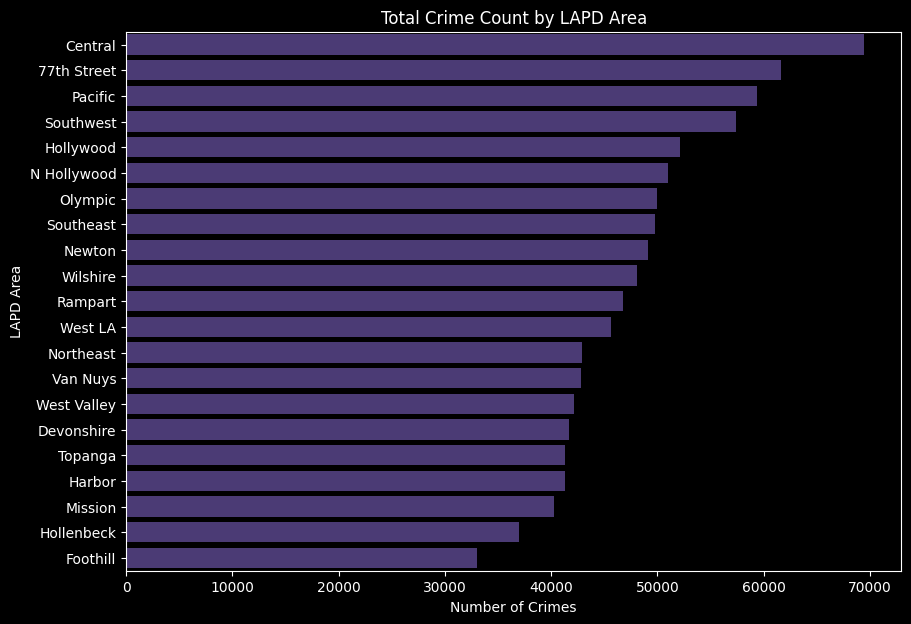

In [251]:
# Straftaten nach LAPD Bereich
area_counts = data['AREA_NAME'].value_counts()

plt.figure(figsize=(10,7))
sns.barplot(x=area_counts.values, y=area_counts.index)
plt.title("Total Crime Count by LAPD Area")
plt.xlabel("Number of Crimes")
plt.ylabel("LAPD Area")
plt.show()


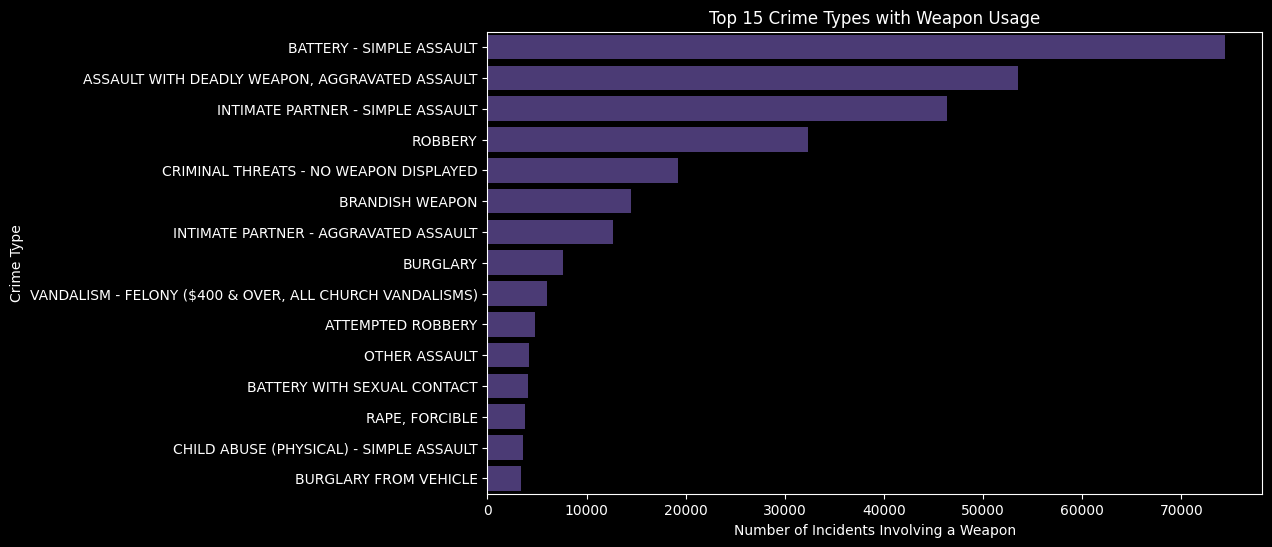

CRM_CD_DESC
BATTERY - SIMPLE ASSAULT                                   74464
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             53499
INTIMATE PARTNER - SIMPLE ASSAULT                          46382
ROBBERY                                                    32298
CRIMINAL THREATS - NO WEAPON DISPLAYED                     19186
BRANDISH WEAPON                                            14491
INTIMATE PARTNER - AGGRAVATED ASSAULT                      12652
BURGLARY                                                    7620
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     6043
ATTEMPTED ROBBERY                                           4837
OTHER ASSAULT                                               4206
BATTERY WITH SEXUAL CONTACT                                 4146
RAPE, FORCIBLE                                              3754
CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT                     3543
BURGLARY FROM VEHICLE                                       3391
Name: count, 

In [252]:
# Straftaten mit Waffen
weapon_cases = data[data['WEAPON_USED_CD'] > 0]

weapon_by_crime = weapon_cases['CRM_CD_DESC'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=weapon_by_crime.values, y=weapon_by_crime.index)
plt.title("Top 15 Crime Types with Weapon Usage")
plt.xlabel("Number of Incidents Involving a Weapon")
plt.ylabel("Crime Type")
plt.show()

weapon_by_crime

### Analyse der Opfer

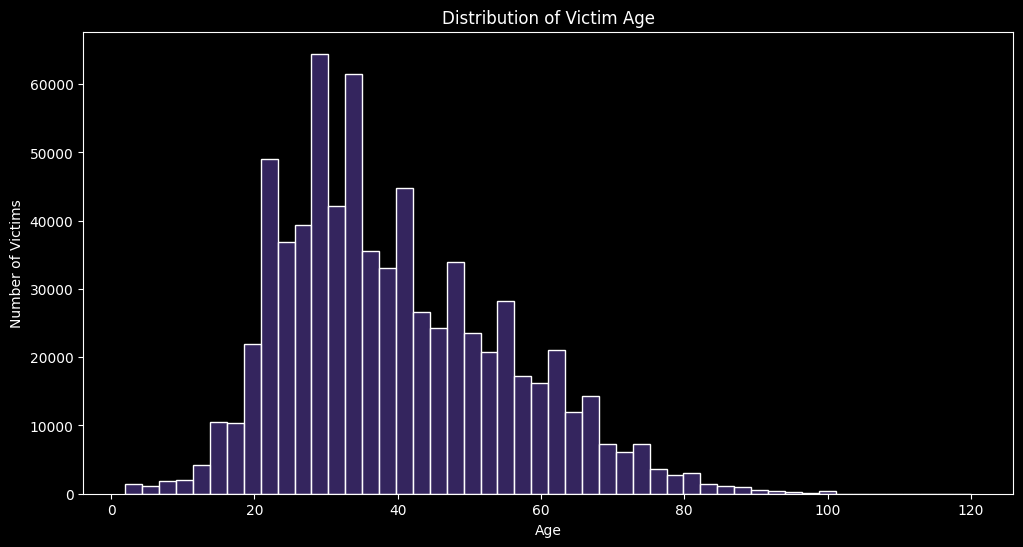

VICT_AGE
30.0     22237
35.0     21787
31.0     21371
29.0     21294
28.0     20927
         ...  
95.0       100
96.0        94
97.0        72
98.0        71
120.0        1
Name: count, Length: 99, dtype: int64


In [253]:
# Verteilung des Alters der Opfer
age_data = data[data['VICT_AGE'] > 0]

plt.figure(figsize=(12,6))
sns.histplot(age_data['VICT_AGE'], bins=50, kde=False)
plt.title("Distribution of Victim Age")
plt.xlabel("Age")
plt.ylabel("Number of Victims")
plt.show()

age_counts = age_data['VICT_AGE'].value_counts()
print(age_counts)

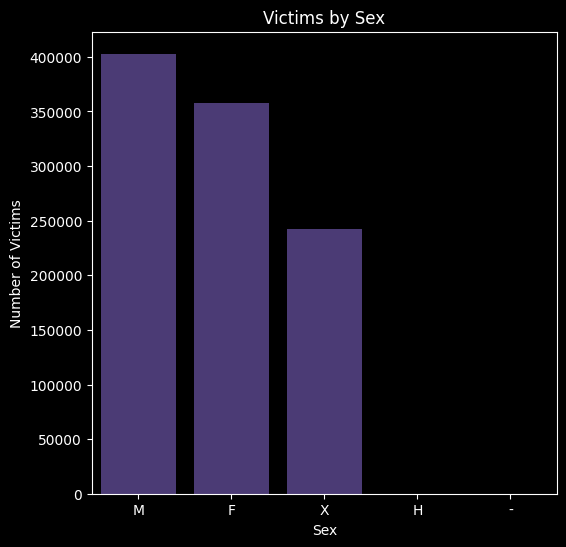

In [254]:
# Verteilung des Geschlechts der Opfer
sex_counts = data['VICT_SEX'].value_counts()

plt.figure(figsize=(6,6))
sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title("Victims by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Victims")
plt.show()


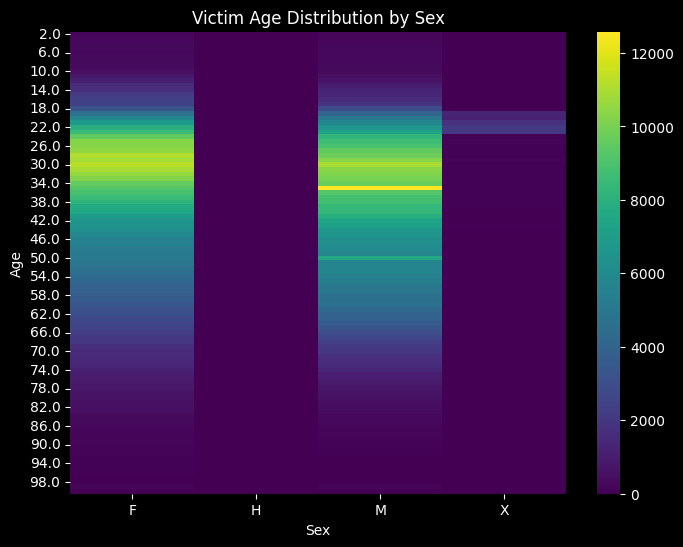

In [255]:
pivot = age_data.pivot_table(index='VICT_AGE', columns='VICT_SEX', aggfunc='size', fill_value=0)

plt.figure(figsize=(8,6))
sns.heatmap(pivot, cmap='viridis')
plt.title("Victim Age Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.show()

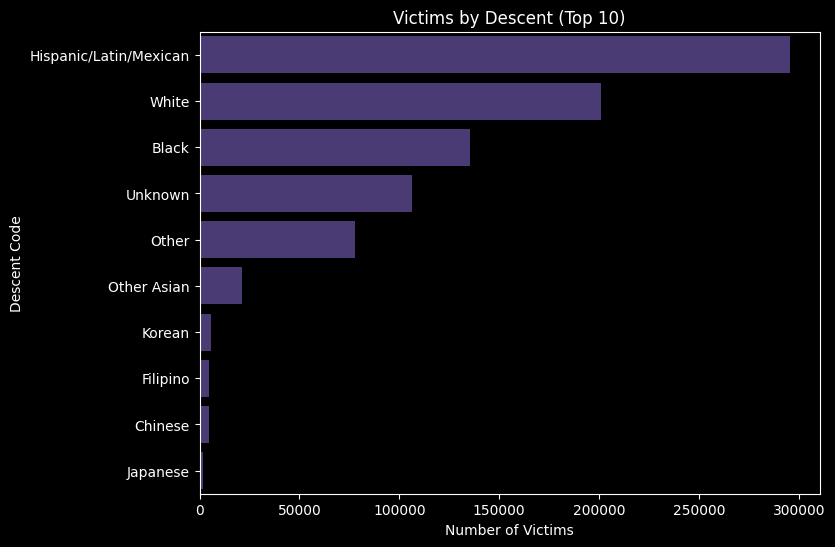

VICT_DESCENT_FULL
Hispanic/Latin/Mexican    295561
White                     201001
Black                     135482
Unknown                   106299
Other                      77817
Other Asian                21308
Korean                      5981
Filipino                    4832
Chinese                     4630
Japanese                    1585
Name: count, dtype: int64

In [ ]:
# Verteilung der Abstammung der Opfer
descent_counts = data['VICT_DESCENT_FULL'].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=descent_counts.values, y=descent_counts.index)
plt.title("Victims by Descent (Top 10)")
plt.xlabel("Number of Victims")
plt.ylabel("Descent Code")
plt.show()

descent_counts

In [257]:
data.head()

,DR_NO,DATE_RPTD,DATE_OCC,TIME_OCC,AREA,AREA_NAME,RPT_DIST_NO,PART_1_2,CRM_CD,CRM_CD_DESC,...,LOCATION,CROSS_STREET,LAT,LON,VICT_DESCENT_FULL,OCC_YEAR,OCC_MONTH,OCC_WEEKDAY,OCC_IS_WEEKEND,OCC_HOUR
0,211507896,2021-04-11,2020-11-07,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,7800 BEEMAN AV,NaN,34.2124,-118.4092,Hispanic/Latin/Mexican,2020,11,5,YES,8
1,201516622,2020-10-21,2020-10-18,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,ATOLL AV,N GAULT,34.1993,-118.4203,Hispanic/Latin/Mexican,2020,10,6,YES,18
2,240913563,2024-12-10,2020-10-30,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,14600 SYLVAN ST,NaN,34.1847,-118.4509,White,2020,10,4,NO,12
3,210704711,2020-12-24,2020-12-24,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,6000 COMEY AV,NaN,34.0339,-118.3747,Other Asian,2020,12,3,NO,13
4,201418201,2020-10-03,2020-09-29,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,4700 LA VILLA MARINA,NaN,33.9813,-118.4350,Hispanic/Latin/Mexican,2020,9,1,NO,18
